In [3]:
!pip install scikit-ntk

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.manifold import TSNE
import csv
from collections import Counter, defaultdict
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import gensim
import gensim.downloader
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from skntk import NeuralTangentKernel as NTK
import ast



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:

# Check Gensim version
print("Gensim version:", gensim.__version__)

# Load pre-trained GloVe word embeddings
# If you're using a version of Gensim before 4.0.0,
# replace gensim.downloader.load with gensim.models.KeyedVectors.load_word2vec_format
word_vectors = gensim.downloader.load('glove-wiki-gigaword-100')

# Example usage:
vector_king = word_vectors['king']
print("Vector for 'king':", vector_king)
print("Shape of the embedding:", vector_king.shape)


Gensim version: 4.3.2
[==================================================] 100.0% 128.1/128.1MB downloaded
Vector for 'king': [-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52506  -1.

In [8]:


# # Load the pre-trained GloVe word vectors
# word_vectors = gensim.downloader.load('glove-wiki-gigaword-100')

# Load your pre-processed data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/preprocessed_data.csv')

# Assuming 'text' column contains pre-processed text data
texts = data['preprocessed_joke'].astype(str)

# Function to generate embeddings for each document
def generate_embedding(text):
    # Split the text into words
    text = str(text)
    words = text.split()
    # Initialize an empty array to store word embeddings
    embeddings = []
    for word in words:
        # Check if the word is in the vocabulary of the pre-trained GloVe model
        if word in word_vectors:
            # If yes, retrieve its word embedding
            embeddings.append(word_vectors[word])
        else:
            # If the word is not in the vocabulary, append zeros (or any other default value)
            embeddings.append(np.zeros(100))  # Assuming GloVe vectors are of size 100
    # Calculate the average embedding for the document
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(100)  # Return zeros if no embeddings found

# Generate embeddings for each document in your dataset
embeddings = np.array([generate_embedding(text) for text in texts])



In [9]:
embeddings_df = pd.DataFrame(embeddings)
embeddings_df['joke_type'] = data['joke_type']

embeddings_df.to_csv('word_embeddings.csv', index=False)


In [10]:
# Assuming your dataset also contains labels in 'label' column
labels = data['joke_type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

SVM

In [ ]:


# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can choose different kernels as per your requirement
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the trained model
import joblib
joblib.dump(svm_classifier, 'svm_model.pkl')


Accuracy: 0.7218664226898445


['svm_model.pkl']

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")




Classification Report:
               precision    recall  f1-score   support

           0     0.6418    0.7344    0.6850      1088
           1     0.6511    0.5573    0.6006      1125
           2     0.6019    0.6024    0.6021      1079
           3     0.9963    1.0000    0.9982      1080

    accuracy                         0.7219      4372
   macro avg     0.7228    0.7235    0.7215      4372
weighted avg     0.7219    0.7219    0.7202      4372

Overall Accuracy: 0.7218664226898445

Accuracy per class:
Class '0': 0.7344
Class '1': 0.5573
Class '2': 0.6024
Class '3': 1.0000


['svm_model.pkl']

In [11]:


# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='poly')  # You can choose different kernels as per your requirement
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7195791399817018


['svm_model.pkl']

In [12]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")



Classification Report:
               precision    recall  f1-score   support

           0     0.6381    0.7243    0.6784      1088
           1     0.6608    0.5716    0.6130      1125
           2     0.6004    0.5959    0.5981      1079
           3     0.9808    0.9926    0.9867      1080

    accuracy                         0.7196      4372
   macro avg     0.7200    0.7211    0.7190      4372
weighted avg     0.7193    0.7196    0.7179      4372

Overall Accuracy: 0.7195791399817018

Accuracy per class:
Class '0': 0.7243
Class '1': 0.5716
Class '2': 0.5959
Class '3': 0.9926


['svm_model.pkl']

KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize k-NN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the k-NN classifier
knn_clf.fit(X_train, y_train)

# Predict labels for test set
y_pred = knn_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6386093321134492


In [16]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0     0.6612    0.4053    0.5026      1088
           1     0.6154    0.4338    0.5089      1125
           2     0.4771    0.7257    0.5757      1079
           3     0.8497    1.0000    0.9188      1080

    accuracy                         0.6386      4372
   macro avg     0.6509    0.6412    0.6265      4372
weighted avg     0.6506    0.6386    0.6251      4372

Overall Accuracy: 0.6386093321134492

Accuracy per class:
Class '0': 0.4053
Class '1': 0.4338
Class '2': 0.7257
Class '3': 1.0000


['svm_model.pkl']

RF

In [ ]:
# Initialize and train the Random Forest classifier
rfc_classifier = RandomForestClassifier(n_estimators=200)  # You can adjust n_estimators for better performance
rfc_classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = rfc_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7154620311070449


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0     0.6262    0.7436    0.6798      1088
           1     0.6200    0.5627    0.5899      1125
           2     0.6231    0.5653    0.5928      1079
           3     0.9963    0.9963    0.9963      1080

    accuracy                         0.7155      4372
   macro avg     0.7164    0.7170    0.7147      4372
weighted avg     0.7152    0.7155    0.7134      4372

Overall Accuracy: 0.7154620311070449

Accuracy per class:
Class '0': 0.7436
Class '1': 0.5627
Class '2': 0.5653
Class '3': 0.9963


XG Boost

In [ ]:

from xgboost import XGBClassifier
# Initialize and train the XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softprob' if len(set(y_train)) > 2 else 'binary:logistic')
# Adjust objective for multi-class or binary classification
xgb_classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.716376944190302


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0     0.6650    0.7132    0.6882      1088
           1     0.6144    0.5778    0.5955      1125
           2     0.5893    0.5811    0.5852      1079
           3     0.9963    0.9991    0.9977      1080

    accuracy                         0.7164      4372
   macro avg     0.7162    0.7178    0.7167      4372
weighted avg     0.7151    0.7164    0.7154      4372

Overall Accuracy: 0.716376944190302

Accuracy per class:
Class '0': 0.7132
Class '1': 0.5778
Class '2': 0.5811
Class '3': 0.9991


NTK

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Ensure X_train and y_train are numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Check the length of the dataset
dataset_length = len(X_train)

# Ensure that dataset contains at least 1000 elements
if dataset_length >= 1000:
    # Use stratified sampling to ensure class balance in the sampled subset
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=6000, stratify=y_train, random_state=42)

    # Initialize NTK kernel (this assumes you have the NTK implementation)
    kernel_ntk = NTK(depth=2)

    # Initialize SVM classifier with NTK kernel
    SVCClf = SVC(kernel=kernel_ntk)

    # Train the classifier
    SVCClf.fit(X_train_subset, y_train_subset)

    # Assuming X_test, y_test are your test data
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Make predictions
    y_pred = SVCClf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
else:
    print("Dataset does not contain enough elements for 1000 random jokes.")


Accuracy: 0.7193504117108874


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)

# Print the classification report
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0     0.6474    0.6985    0.6720      1088
           1     0.6380    0.5796    0.6074      1125
           2     0.5985    0.6052    0.6018      1079
           3     0.9954    1.0000    0.9977      1080

    accuracy                         0.7194      4372
   macro avg     0.7198    0.7208    0.7197      4372
weighted avg     0.7189    0.7194    0.7185      4372

Overall Accuracy: 0.7193504117108874

Accuracy per class:
Class '0': 0.6985
Class '1': 0.5796
Class '2': 0.6052
Class '3': 1.0000


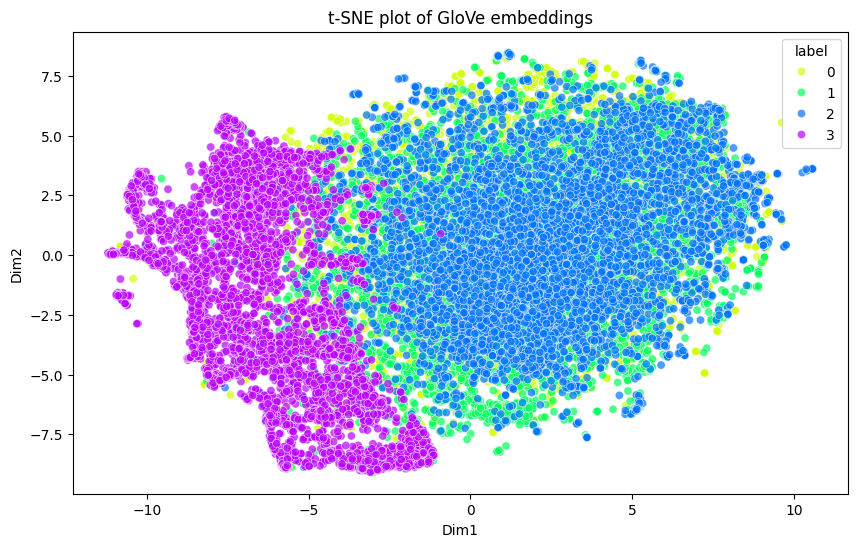

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/word_embeddings.csv')  # Update with your file path
# Assuming your CSV file has columns for each GloVe embedding dimension, e.g., 'glove_1', 'glove_2', ..., 'glove_100'
# And a column named 'label' for the joke type

# Extract features (GloVe embeddings) and labels
features = data.drop('joke_type', axis=1).values  # Assuming the embeddings start from the first column
labels = data['joke_type'].values

# Apply t-SNE
tsne_model = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_features = tsne_model.fit_transform(features)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_features, columns=['Dim1', 'Dim2'])
tsne_df['label'] = labels

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Dim1', y='Dim2',
    hue='label',
    palette=sns.color_palette("hsv", len(set(labels))),
    data=tsne_df,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE plot of GloVe embeddings')
plt.show()
